# Import libraries

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# face detection

In [2]:
training_data_folder_path = 'dataset/training-data'
test_data_folder_path = 'dataset/test-data'

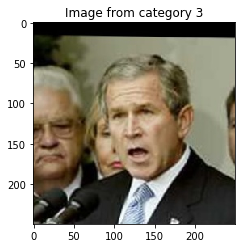

In [3]:
random_image = cv2.imread('dataset/training-data/3/George_W_Bush_0020.jpg')
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('Image from category 3')# change category name accordingly
plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
lbpcascade_frontalface = 'opencv_xml_files/lbpcascade_frontalface.xml'

In [5]:
def detect_face(input_img):
    image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(lbpcascade_frontalface)
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.2, minNeighbors=5);
    if (len(faces) == 0):
        return -1, -1
    (x, y, w, h) = faces[0]
    return image[y:y+w, x:x+h], faces[0]

# prepare training dataset
Also note that, lbph based face recognizer does not same image size

In [6]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    face_labels = []
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)
        
        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not -1:
                resized_face = cv2.resize(face, (121,121), interpolation = cv2.INTER_AREA)
                detected_faces.append(face)
                face_labels.append(label)

    return detected_faces, face_labels

In [7]:
detected_faces, face_labels = prepare_training_data("dataset/training-data")

# Note that no. of total faces reduces to 83 but observe that face detection process is faster. LBP based face detection is faster but less accurate than haarcascade based method

In [8]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))

Total faces:  93
Total labels:  93


# initialize a face recognizer

In [9]:
lbphfaces_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8)

# train the face recognizer model

In [10]:
lbphfaces_recognizer.train(detected_faces, np.array(face_labels))

In [11]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

# predict output on test data

In [12]:
def predict(test_image):
    face, rect = detect_face(test_image)
    label= lbphfaces_recognizer.predict(face)
    label_text = tags[label[0]]
    draw_rectangle(test_image, rect)
    draw_text(test_image, label_text, rect[0], rect[1]-5)
    return test_image, label_text

In [13]:
tags = ['0', '1', '2', '3', '4']

In [14]:
test_image = cv2.imread("dataset/test-data/3/George_W_Bush_0021.jpg")

In [15]:
predicted_image, label = predict(test_image)

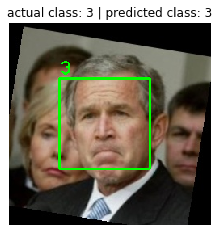

In [16]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[3]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
imgplot = plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()